In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np

rng = np.random.RandomState(0)

n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
# sort the data to make plotting easier later
data = np.sort(rng.rand(n_sample) * len_data - len_data / 2)
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

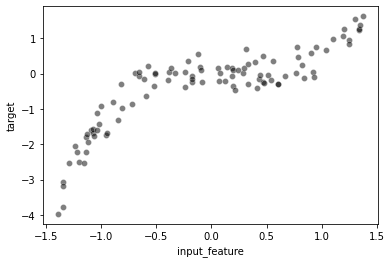

In [3]:
import pandas as pd

full_data = pd.DataFrame({"input_feature": data, "target": target})

import seaborn as sns
_ = sns.scatterplot(data = full_data, x="input_feature", y ="target", color = "black", alpha = .5)

In [4]:
# X should be 2D for sklearn: (n_samples, n_features)
data = data.reshape((-1, 1))
data.shape

(100, 1)

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(data, target)
y_pred = model.predict(data)
mse = mean_squared_error(target, y_pred)

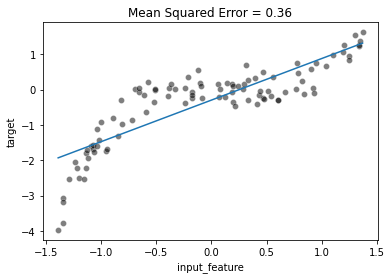

In [6]:
ax = sns.scatterplot(data = full_data, x = "input_feature", y = "target", color = "black", alpha = .5)
ax.plot(data, y_pred)
_ = ax.set_title(f"Mean Squared Error = {mse:.2f}")

In [7]:
# let us check the coefficients 
print(f"Weight {model.coef_[0]:.2f},"
      "\n"
      f"Intercept {model.intercept_:.2f}")

Weight 1.18,
Intercept -0.29


In [8]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=3).fit(data, target)
y_pred = tree.predict(data)
mse = mean_squared_error(target, y_pred)

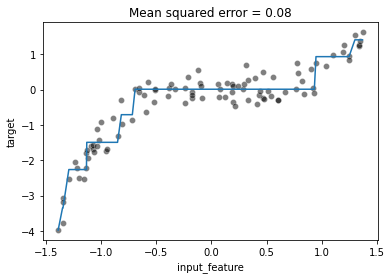

In [9]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, y_pred)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")


Instead of having a model which can natively deal with non-linearity, we
could also modify our data: we could create new features, derived from the
original features, using some expert knowledge. In this example, we know that
we have a cubic and squared relationship between `data` and `target` (because
we generated the data).

Indeed, we could create two new features (`data ** 2` and `data ** 3`) using
this information as follows. This kind of transformation is called a
polynomial feature expansion:

In [10]:
data.shape

(100, 1)

In [11]:
data_expanded = np.concatenate([data, data ** 2, data ** 3], axis=1)
data_expanded.shape

(100, 3)

In [12]:
model.fit(data_expanded, target)
y_pred = model.predict(data_expanded)
mse = mean_squared_error(target, y_pred)

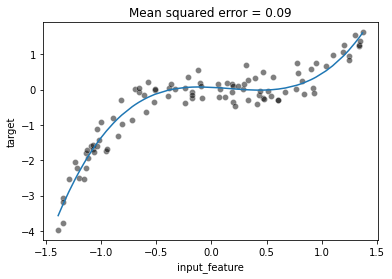

In [13]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, y_pred)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Instead of manually creating such polynomial features one could directly use
[sklearn.preprocessing.PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).


In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=3),
    LinearRegression(),
)
polynomial_regression.fit(data, target)
y_pred = polynomial_regression.predict(data)
mse = mean_squared_error(target, y_pred)

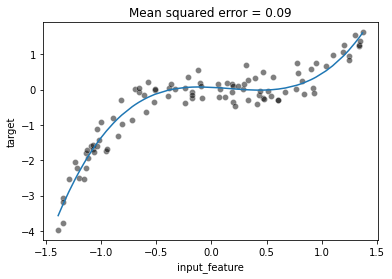

In [15]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, y_pred)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")


As expected, we observe that the predictions of the this `PolynomialFeatures`
pipeline match the predictions of the linear model fit on manually engineered
features.

The last possibility is to make a linear model more expressive is to use a
"kernel". Instead of learning a weight per feature as we previously
emphasized, a weight will be assigned to each sample. However, not all
samples will be used. This is the base of the support vector machine
algorithm.

The mathematical definition of "kernels" and "support vector machines" is
beyond the scope of this course. We encourage interested readers with a
mathematical training to have a look at the scikit-learn [documentation on
SVMs](https://scikit-learn.org/stable/modules/svm.html) for more details.

For the rest of us, let us just develop some intuitions on the relative
expressive power of support vector machines with linear and non-linear
kernels by fitting them on the same dataset.

First, consider a support vector machine with a linear kernel:

In [16]:
from sklearn.svm import SVR

svr = SVR(kernel = "linear")
svr.fit(data, target)
y_pred = svr.predict(data)
mse = mean_squared_error(target, y_pred)

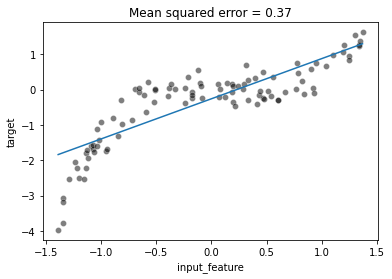

In [17]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, y_pred)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")


The predictions of our SVR with a linear kernel are all aligned on a straight
line. `SVR(kernel="linear")` is indeed yet another example of a linear model.

The estimator can also be configured to use a non-linear kernel. Then, it can
learn a prediction function that computes non-linear interaction between
samples for which we want to make a prediction and selected samples from the
training set.

The result is another kind of non-linear regression model with a similar
expressivity as our previous polynomial regression pipeline:

In [18]:
svr = SVR(kernel="poly", degree=3)
svr.fit(data, target)
y_pred = svr.predict(data)
mse = mean_squared_error(target, y_pred)

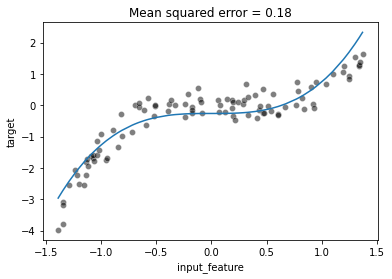

In [19]:
ax = sns.scatterplot(data=full_data, x="input_feature", y="target",
                     color="black", alpha=0.5)
ax.plot(data, y_pred)
_ = ax.set_title(f"Mean squared error = {mse:.2f}")

Kernel methods such as SVR are very efficient for small to medium datasets.

For larger datasets with `n_samples >> 10_000`, it is often computationally
more efficient to perform explicit feature expansion using
`PolynomialFeatures` or other non-linear transformers from scikit-learn such
as
[KBinsDiscretizer](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html)
or
[Nystroem](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_approximation.Nystroem.html).


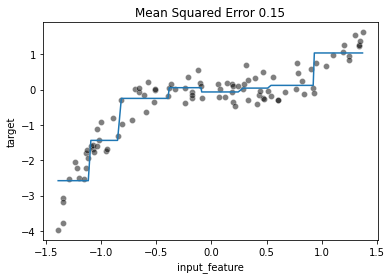

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

binned_regression = make_pipeline(
    KBinsDiscretizer(n_bins = 8), LinearRegression(),
)
binned_regression.fit(data, target)
y_pred = binned_regression.predict(data)
mse = mean_squared_error(target, y_pred)

ax = sns.scatterplot(data = full_data, x = "input_feature", y = "target", color="black", alpha = .5)
ax.plot(data, y_pred)
_ = ax.set_title(f"Mean Squared Error {mse:.2f}")

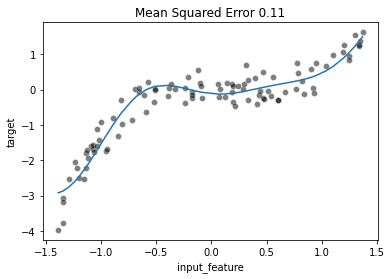

In [21]:
from sklearn.kernel_approximation import Nystroem

nystroem_regression = make_pipeline(
    Nystroem(n_components = 5),
    LinearRegression(),
)
nystroem_regression.fit(data, target)
y_pred = nystroem_regression.predict(data)
mse = mean_squared_error(target, y_pred)

ax = sns.scatterplot(data = full_data, x="input_feature", y="target", color="black", alpha=.5)
ax.plot(data, y_pred)
_ = ax.set_title(f"Mean Squared Error {mse:.2f}")